In [1]:
import torch
import torch.nn as nn

import numpy as np

In [2]:
DEBUG = False

## Partial Convolution

In [3]:
# class PartialConv2d(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
#         super().__init__()
        
#         self.in_channels = in_channels
#         self.out_channels = out_channels
#         self.kernel_size = kernel_size
#         self.stride = stride

#         self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=False)  # TODO: see no bias here!
#         self.conv_bias = nn.Parameter(torch.zeros(out_channels), requires_grad=True)
        
#         self.sum_conv = nn.Conv2d(in_channels, 1, kernel_size, stride=stride, padding=padding, bias=False)
#         self.sum_conv.weight.data.fill_(1)
#         self.sum_conv.weight.requires_grad_(False)  # TODO: check that not learning
        
    
#     def forward(self, x, mask):
#         """
#         Forward pass of Partial Convolution (arxiv.org/abs/1804.07723)
        
#         Parameters
#         ----------
#         x : FloatTensor, input feature tensor of shape (b, c, h, w)
#         mask : FloatTensor, binary mask tensor of shape (b, c, h, w)
#         """
#         #mask_unsqueezed = mask.unsqueeze(1)  # making mask of shape (b, 1, h, w)
#         assert x.shape == mask.shape, 'x and mask shapes must be equal'
        
#         x_masked = x * mask
#         x_after_conv = self.conv(x_masked)

#         mask_norm = self.sum_conv(mask)
#         x_after_conv_normed = torch.where(mask_norm != 0, x_after_conv / mask_norm, torch.zeros_like(x_after_conv))
#         x_after_conv_normed += self.conv_bias.view(1, -1, 1, 1)

#         updated_mask_single = (self.sum_conv(mask) > 0).type(torch.FloatTensor)
#         updated_mask = torch.cat([updated_mask_single] * self.out_channels, dim=1)

#         if DEBUG:
#             print('x')
#             print(x)
#             print()

#             print('mask')
#             print(mask)
#             print()
            
#             print('x_masked')
#             print(x_masked)
#             print()

#             print('x_after_conv')
#             print(x_after_conv)
#             print()

#             print('mask_norm')
#             print(mask_norm)
#             print()

#             print('x_after_conv_normed')
#             print(x_after_conv_normed)
#             print()

#             print('updated_mask')
#             print(updated_mask)
#             print()
            
#         return x_after_conv_normed, updated_mask

In [4]:
class PartialConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super().__init__()
        
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride

        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding, bias=False)  # TODO: see no bias here!
        self.conv_bias = nn.Parameter(torch.zeros(out_channels), requires_grad=True)
        
        self.sum_conv = nn.Conv2d(in_channels, 1, kernel_size, stride=stride, padding=padding, bias=False)
        self.sum_conv.weight.data.fill_(1)
        self.sum_conv.weight.requires_grad_(False)  # TODO: check that not learning
        
    
    def forward(self, x, mask):
        """
        Forward pass of Partial Convolution (arxiv.org/abs/1804.07723)
        
        Parameters
        ----------
        x : FloatTensor, input feature tensor of shape (b, c, h, w)
        mask : FloatTensor, binary mask tensor of shape (b, c, h, w)
        """
        #mask_unsqueezed = mask.unsqueeze(1)  # making mask of shape (b, 1, h, w)
        assert x.shape == mask.shape, 'x and mask shapes must be equal'
        
        x_masked = x * mask
        x_after_conv = self.conv(x_masked)

        mask_norm = self.sum_conv(mask)
#         x_after_conv_normed = torch.where(mask_norm != 0, x_after_conv / mask_norm, torch.zeros_like(x_after_conv))
        x_after_conv_normed = x_after_conv
        x_after_conv_normed += self.conv_bias.view(1, -1, 1, 1)

        updated_mask_single = (self.sum_conv(mask) > 0).type(torch.FloatTensor)
        updated_mask = torch.cat([updated_mask_single] * self.out_channels, dim=1)

        if DEBUG:
            print('x')
            print(x)
            print()

            print('mask')
            print(mask)
            print()
            
            print('x_masked')
            print(x_masked)
            print()

            print('x_after_conv')
            print(x_after_conv)
            print()

            print('mask_norm')
            print(mask_norm)
            print()

            print('x_after_conv_normed')
            print(x_after_conv_normed)
            print()

            print('updated_mask')
            print(updated_mask)
            print()
            
        return x_after_conv_normed, updated_mask

In [5]:
# class PartialConv2d(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
#         super().__init__()
        
#         self.in_channels = in_channels
#         self.out_channels = out_channels
#         self.kernel_size = kernel_size
#         self.stride = stride

#         self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding)
        
#         self.sum_conv = nn.Conv2d(in_channels, 1, kernel_size, stride=stride, padding=padding, bias=False)
#         self.sum_conv.weight.data.fill_(1)
#         self.sum_conv.weight.requires_grad_(False)  # TODO: check that not learning
        
    
#     def forward(self, x, mask):
#         """
#         Forward pass of Partial Convolution (arxiv.org/abs/1804.07723)
        
#         Parameters
#         ----------
#         x : FloatTensor, input feature tensor of shape (b, c, h, w)
#         mask : FloatTensor, binary mask tensor of shape (b, c, h, w)
#         """
#         #mask_unsqueezed = mask.unsqueeze(1)  # making mask of shape (b, 1, h, w)
#         assert x.shape == mask.shape, 'x and mask shapes must be equal'
        
# #         x_masked = x * mask
#         x_after_conv = self.conv(x)
#         updated_mask_single = (self.sum_conv(mask) > 0).type(torch.FloatTensor)
#         updated_mask = torch.cat([updated_mask_single] * self.out_channels, dim=1)
#         return x_after_conv, updated_mask

# #         mask_norm = self.sum_conv(mask)
# #         x_after_conv_normed = torch.where(mask_norm != 0, x_after_conv / mask_norm, torch.zeros_like(x_after_conv))

# #         updated_mask_single = (self.sum_conv(mask) > 0).type(torch.FloatTensor)
# #         updated_mask = torch.cat([updated_mask_single] * self.out_channels, dim=1)

# #         if DEBUG:
# #             print('x')
# #             print(x)
# #             print()

# #             print('mask')
# #             print(mask)
# #             print()
            
# #             print('x_masked')
# #             print(x_masked)
# #             print()

# #             print('x_after_conv')
# #             print(x_after_conv)
# #             print()

# #             print('mask_norm')
# #             print(mask_norm)
# #             print()

# #             print('x_after_conv_normed')
# #             print(x_after_conv_normed)
# #             print()

# #             print('updated_mask')
# #             print(updated_mask)
# #             print()
            
# #         return x_after_conv_normed, updated_mask

Testing:

In [6]:
b, c, h, w = 1, 1, 5, 5

x = torch.randint(0, 5, (b, c, h, w))

mask_single = (torch.rand((b, h, w)) > 0.6).unsqueeze(1).type(torch.FloatTensor)
mask = torch.cat([mask_single] * c, dim=1)

pconv = PartialConv2d(c, 1, 3, stride=2)

x_new, mask_new = pconv(x, mask)

## Network

In [7]:
class InpaintDownBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=2, padding='same', bn=True):
        super().__init__()
        
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        
        padding = (kernel_size - 1) // 2 if padding == 'same' else padding
        self.padding = padding
        
        self.bn = bn
        
        self.pconv = PartialConv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding)
        if bn:
            self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x, mask):
        x, mask = self.pconv(x, mask)
        if self.bn:
            x = self.bn(x)
        x = self.relu(x)
        
        return x, mask

In [8]:
# b, c, h, w = 2, 3, 256, 256

# x = torch.randint(0, 5, (b, c, h, w))

# mask_single = (torch.rand((b, h, w)) > 0.8).unsqueeze(1).type(torch.FloatTensor)
# mask = torch.cat([mask_single] * c, dim=1)

# down_blocks = [
#     InpaintDownBlock(3, 64, 7, stride=2, bn=False),
#     InpaintDownBlock(64, 128, 5, stride=2, bn=True),
#     InpaintDownBlock(128, 256, 5, stride=2, bn=True),
#     InpaintDownBlock(256, 512, 3, stride=2, bn=True),
#     InpaintDownBlock(512, 512, 3, stride=2, bn=True),
#     InpaintDownBlock(512, 512, 3, stride=2, bn=True),
#     InpaintDownBlock(512, 512, 3, stride=2, bn=True),
#     InpaintDownBlock(512, 512, 3, stride=2, bn=True)
# ]

# for down_block in down_blocks:
#     print(x.shape, mask.shape)
#     x, mask = down_block(x, mask)

In [9]:
class InpaintUpBlock(nn.Module):
    def __init__(self, in_channels, in_channels_bridge, out_channels, kernel_size, padding='same', bn=True):
        super().__init__()
        
        self.in_channels = in_channels
        self.in_channels_bridge = in_channels_bridge
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        
        padding = (kernel_size - 1) // 2 if padding == 'same' else padding
        self.padding = padding
        
        self.bn = bn
        
        self.upsample = nn.Upsample(scale_factor=2, mode='nearest')  # TODO: align corners!
        
        self.pconv = PartialConv2d(in_channels + in_channels_bridge, out_channels, kernel_size, padding=padding)
        if bn:
            self.bn = nn.BatchNorm2d(out_channels)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.2, inplace=True)
        
    def forward(self, x, mask, x_bridge, mask_bridge):
        x, mask = self.upsample(x), self.upsample(mask)
        torch.cat([mask, mask_bridge], dim=1)
        x, mask = torch.cat([x, x_bridge], dim=1), torch.cat([mask, mask_bridge], dim=1)
        
        x, mask = self.pconv(x, mask)
        
        if self.bn:
            x = self.bn(x)
        x = self.leaky_relu(x)
        
        return x, mask

In [10]:
# b, c, h, w = 2, 3, 256, 256

# x = torch.randint(0, 5, (b, c, h, w))

# mask_single = (torch.rand((b, h, w)) > 0.8).unsqueeze(1).type(torch.FloatTensor)
# mask = torch.cat([mask_single] * c, dim=1)

# c_bridge = 7
# x_bridge = torch.randint(0, 5, (b, c_bridge, 2 * h, 2 * w))

# mask_single_bridge = (torch.rand((b, 2 * h, 2 * w)) > 0.8).unsqueeze(1).type(torch.FloatTensor)
# mask_bridge = torch.cat([mask_single_bridge] * c_bridge, dim=1)

# up_block = InpaintUpBlock(c, c_bridge, 3, 3, bn=True)

# x_new, mask_new = up_block(x, mask, x_bridge, mask_bridge)

In [11]:
class InpaintNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        
        self.in_channels = in_channels
        self.out_channels = out_channels
        
        self.depth = 7
        
        # down
        self.down_blocks = nn.ModuleList([
            InpaintDownBlock(in_channels, 64, 7, stride=2, padding='same', bn=False),
            InpaintDownBlock(64, 128, 5, stride=2, padding='same', bn=False),
            InpaintDownBlock(128, 256, 5, stride=2, padding='same', bn=False),
            InpaintDownBlock(256, 512, 3, stride=2, padding='same', bn=False),
            InpaintDownBlock(512, 512, 3, stride=2, padding='same', bn=False),
            InpaintDownBlock(512, 512, 3, stride=2, padding='same', bn=False),
            InpaintDownBlock(512, 512, 3, stride=2, padding='same', bn=False),
#             InpaintDownBlock(512, 512, 3, stride=2, padding='same', bn=True)
        ])
        
        # up
        self.up_blocks = nn.ModuleList([
#             InpaintUpBlock(512, 512, 512, 3, padding='same', bn=True),
            InpaintUpBlock(512, 512, 512, 3, padding='same', bn=False),
            InpaintUpBlock(512, 512, 512, 3, padding='same', bn=False),
            InpaintUpBlock(512, 512, 512, 3, padding='same', bn=False),
            InpaintUpBlock(512, 256, 256, 3, padding='same', bn=False),
            InpaintUpBlock(256, 128, 128, 3, padding='same', bn=False),
            InpaintUpBlock(128, 64, 64, 3, padding='same', bn=False),
            InpaintUpBlock(64, 3, 3, 3, padding='same', bn=False)
        ])
        
#         down_n_filters = [64, 128, 256, 512, 512, 512, 512, 512]
#         down_kernel_sizes = [7, 5, 5, 3, 3, 3, 3, 3]
#         down_use_bn = [False, True, True, True, True, True, True, True]
        
#         for i in range(self.depth):
#             down_block = InpaintDownBlock(in_channels, down_n_filters[i], down_kernel_sizes[i],
#                                           stride=2, padding='same', bn=down_use_bn[i])
#             down_blocks.append(down_block)
#             in_channels = down_n_filters[i]

        
#         # up
#         up_blocks = []
#         up_n_filters = [512, 512, 512, 512, 256, 128, 64]
#         up_kernel_sizes = [3, 3, 3, 3, 3, 3, 3]
#         up_use_bn = [True, True, True, True, True, True, True]
#         for i in range(self.depth - 1):
#             in_channels_bridge = down_n_filters[len(down_blocks) - i - 2]
#             up_block = InpaintUpBlock(in_channels, in_channels_bridge, up_n_filters[i], up_kernel_sizes[i],
#                                       padding='same', bn=up_use_bn[i])
#             up_blocks.append(up_block)
#             in_channels = up_n_filters[i]
        
#         up_block = InpaintUpBlock(in_channels, self.in_channels, out_channels, 3,
#                                   padding='same', bn=False)    
#         up_blocks.append(up_block)
        
#         # final
#         self.down_blocks = nn.ModuleList(down_blocks)
#         self.up_blocks = nn.ModuleList(up_blocks)
        
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x, mask):
        x_bridges, mask_bridges = [], []
        for i in range(self.depth):
#             print('down {} mean image: {}'.format(i, torch.mean(x)))
#             print('down {} mean mask: {}'.format(i, torch.mean(mask)))
            
            x_bridges.append(x)
            mask_bridges.append(mask)
            x, mask = self.down_blocks[i](x, mask)

        for i in range(self.depth):
#             print('up {} mean image: {}'.format(i, torch.mean(x)))
#             print('up {} mean mask: {}'.format(i, torch.mean(mask)))
            x, mask = self.up_blocks[i](x, mask, x_bridges[-i - 1], mask_bridges[-i - 1])
        
        x = self.sigmoid(x)
        return x, mask

In [12]:
# b, c, h, w = 2, 3, 256, 256

# x = torch.randint(0, 5, (b, c, h, w))

# mask_single = (torch.rand((b, h, w)) > 0.95).unsqueeze(1).type(torch.FloatTensor)
# # print(mask_single.shape)
# mask = torch.cat([mask_single] * c, dim=1)
# # print(mask.shape)

# inpaint_net = InpaintNet(3, 3)

# x_new, mask_new = inpaint_net(x, mask)

---

## Imports

In [13]:
import os
import numpy as np
from datetime import datetime

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from tensorboardX import SummaryWriter

from matplotlib import pylab as plt
%matplotlib inline

from tqdm import tqdm_notebook as tqdm

In [14]:
from imp import reload
import inpaint

## Setup

In [15]:
class config:
    device = 'cuda:1' if torch.cuda.is_available() else 'cpu'
    
    train_dataset_path = './data/celebA-HQ/train'
    val_dataset_path = './data/celebA-HQ/train'
    
    in_channels = 3
    out_channels = 3
    
    train_batch_size = 2
    val_batch_size = 2
    
    n_epochs = 100
    
    tensorboard_path = './tensorboard'
    
    n_workers = 1

## Data

In [16]:
train_dataloader = inpaint.make_dataloader(config.train_dataset_path,
                                           batch_size=config.train_batch_size,
                                           shuffle=True,
                                           num_workers=config.n_workers)

val_dataloader = inpaint.make_dataloader(config.val_dataset_path,
                                         batch_size=config.val_batch_size,
                                         shuffle=False,
                                         num_workers=config.n_workers)

Check:

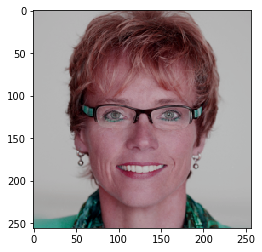

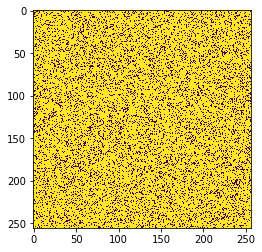

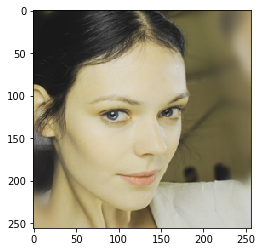

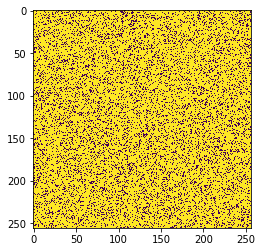

In [17]:
i = 0
for batch in train_dataloader:
    image_batch, mask_batch = batch
    plt.imshow(image_batch[0].numpy().transpose((1, 2, 0)))
    plt.show()
    plt.imshow(mask_batch[0].numpy())
    plt.show()
    
    i += 1
    if i > 3: break

## Load model and associated stuff

In [18]:
model = InpaintNet(config.in_channels, config.out_channels).to(config.device)
opt = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

In [19]:
# criterion = inpaint.modules.InpaintLoss().to(config.device)
criterion = nn.MSELoss()

In [20]:
experiment_name = 'InpaintNet@{}'.format(datetime.now().strftime("%d.%m.%Y %H:%M"))
writer = SummaryWriter(os.path.join(config.tensorboard_path, experiment_name))

## Train loop

In [21]:
def expand_mask(mask_batch, n_channels):
    return torch.cat([mask_batch.unsqueeze(1)] * n_channels, dim=1)

def preprocess_batch(batch):
    image_batch, mask_batch = batch
    image_batch, mask_batch = image_batch.type(torch.FloatTensor), mask_batch.type(torch.FloatTensor)
    
    mask_batch = expand_mask(mask_batch, config.in_channels)
    
    image_masked_batch = image_batch * mask_batch
    
    return image_batch, image_masked_batch, mask_batch

In [22]:
for name, param in model.named_parameters():
    break

In [23]:
model.down_blocks[6].pconv.conv.weight

Parameter containing:
tensor([[[[ 2.5598e-03,  3.8015e-03,  7.7703e-03],
          [-1.1344e-02, -1.2475e-03,  1.0435e-02],
          [-3.2048e-03, -1.0828e-02, -1.3562e-02]],

         [[ 4.5322e-03, -1.4419e-02,  5.6345e-04],
          [ 8.8920e-03,  3.8547e-03,  6.2416e-03],
          [-6.3242e-03,  2.5839e-03,  4.5034e-03]],

         [[ 6.7910e-03,  4.0378e-03,  1.3208e-02],
          [-3.7310e-03, -1.1954e-02,  2.1763e-03],
          [ 1.6485e-03,  7.1290e-03, -5.0741e-03]],

         ...,

         [[ 1.7510e-03, -3.8539e-03,  2.1342e-03],
          [-6.5381e-03,  7.2266e-03,  6.8671e-03],
          [-7.7626e-03, -3.0601e-03, -5.9647e-03]],

         [[ 5.8769e-03,  2.6878e-03,  6.8524e-03],
          [ 9.2148e-03, -1.3891e-03, -2.7324e-03],
          [-3.6487e-03,  1.0492e-02, -1.1600e-02]],

         [[-3.6211e-03, -6.4418e-03,  9.0634e-03],
          [-1.1679e-02,  2.2681e-03, -7.3584e-03],
          [ 4.3990e-03, -1.4604e-02,  5.3895e-03]]],


        [[[ 8.5359e-03,  5.8919

In [24]:
i = 0
for epoch in range(config.n_epochs):
    print('Epoch: {}'.format(epoch))
    
    for name, param in model.named_parameters():
        writer.add_histogram(name, param.clone().data.numpy(), epoch)

    # Train
    model.train()
    train_loss = train_batches =  0
    for batch in tqdm(train_dataloader):
        image_batch, image_masked_batch, mask_batch = preprocess_batch(batch)
        
        # to device
        image_batch = image_batch.to(config.device)
        image_masked_batch = image_masked_batch.to(config.device)
        mask_batch = mask_batch.to(config.device)
        
        # inference and backprop
        image_pred_batch, mask_pred_batch = model(image_masked_batch, mask_batch)
#         loss = criterion(image_pred_batch, mask_batch, image_batch)
        loss = criterion(image_pred_batch, image_batch)
        
        loss.backward()
        opt.step()
        opt.zero_grad()
        
        # collect metrics
        n_iters = epoch * len(train_dataloader) + train_batches
        writer.add_scalar('train/loss', loss.item(), n_iters)
        
        train_loss += loss.item()
        train_batches += 1
        
    print('\tTrain loss:\t{:.5}'.format(train_loss / train_batches))
    
    # Validation
    model.eval()
    val_loss = val_batches =  0
    n_images_to_draw = 0
    for batch in tqdm(val_dataloader):
        image_batch, image_masked_batch, mask_batch = preprocess_batch(batch)
        
        # to device
        with torch.no_grad():
            image_batch = image_batch.to(config.device)
            image_masked_batch = image_masked_batch.to(config.device)
            mask_batch = mask_batch.to(config.device)
        
        # inference
        image_pred_batch, mask_pred_batch = model(image_masked_batch, mask_batch)
#         loss = criterion(image_pred_batch, mask_batch, image_batch)
        loss = criterion(image_pred_batch, image_batch)
    
        
        # collect metrics
        n_iters = epoch * len(val_dataloader) + val_batches
        if n_images_to_draw < 3:
            writer.add_image('val/image_pred_{}'.format(n_images_to_draw), image_pred_batch[0], n_iters)
            writer.add_image('val/image_gt_{}'.format(n_images_to_draw), image_batch[0], n_iters)
            writer.add_image('val/mask_{}'.format(n_images_to_draw), mask_batch[0], n_iters)
            
        n_images_to_draw += 1
        
        val_loss += loss.item()
        val_batches += 1
        
    writer.add_scalar('val/loss', val_loss / val_batches, epoch)
    
    print('\tVal loss:\t{:.5}'.format(val_loss / val_batches))
    print()

Epoch: 0


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


	Train loss:	0.099418


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


	Val loss:	0.11215

Epoch: 1


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


	Train loss:	0.09515


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


	Val loss:	0.086894

Epoch: 2


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


	Train loss:	0.07444


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


	Val loss:	0.09724

Epoch: 3


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


	Train loss:	0.084646


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


	Val loss:	0.099347

Epoch: 4


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


	Train loss:	0.20468


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


	Val loss:	0.10351

Epoch: 5


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


	Train loss:	0.092168


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


	Val loss:	0.084652

Epoch: 6


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


	Train loss:	0.074593


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))


	Val loss:	0.08298

Epoch: 7


HBox(children=(IntProgress(value=0, max=2), HTML(value='')))

Process Process-16:
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/iskakov/karfly_env/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Version

Exception ignored in: <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x10ca77898>>
Traceback (most recent call last):
  File "/Users/iskakov/karfly_env/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 347, in __del__
    def __del__(self):
  File "/Users/iskakov/karfly_env/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 178, in handler
    _error_if_any_worker_fails()
RuntimeError: DataLoader worker (pid 91596) exited unexpectedly with exit code 1.


KeyboardInterrupt: 